In [76]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Function to load JSON lines
def load_json_lines(file_path):
    with open(file_path, 'r') as f:
        return [json.loads(line) for line in f]

def plot_grid_search_results(grid_search_results, filter_epochs=None, filter_lr=None, filter_batch_sizes=None, color_palette=None, marker_dict=None):
    df = pd.DataFrame(grid_search_results)
    df['learning_rate'] = df['hyperparameters'].apply(lambda x: x['learning_rate'])
    df['batch_size'] = df['hyperparameters'].apply(lambda x: x['batch_size'])
    df['epochs'] = df['hyperparameters'].apply(lambda x: x['epochs'])

    if filter_epochs is not None:
        df = df[df['epochs'] <= filter_epochs]
    
    if filter_lr is not None:
        df = df[df['learning_rate'] == filter_lr]
    
    if filter_batch_sizes is not None:
        df = df[df['batch_size'].isin(filter_batch_sizes)]

    plt.figure(figsize=(12, 8))
    sns.lineplot(
        data=df, 
        x='epochs', 
        y='accuracy', 
        hue='learning_rate', 
        style='batch_size', 
        palette=color_palette,
        markers=marker_dict,
        dashes=False,
        markersize=10
    )
    plt.title('Grid Search Results')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(title='Learning Rate & Batch Size', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

# Define the color palette
colors = sns.color_palette("husl", 2)
lrs = [1e-05, 5e-05]
color_palette = {lr: color for lr, color in zip(lrs, colors)}

# Define the markers
bss = [10, 16, 32, 40, 45]
markers = ['o', 's', 'D', '^', 'P']
marker_dict = {bs: marker for bs, marker in zip(bss, markers)}



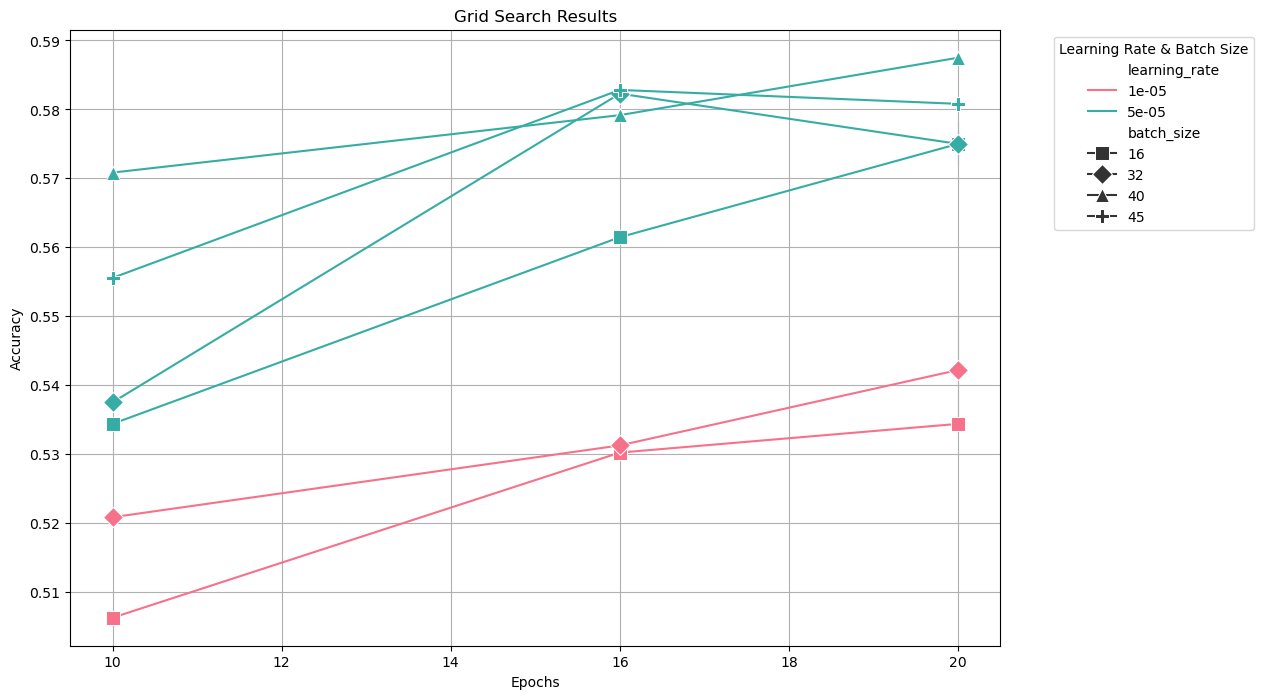

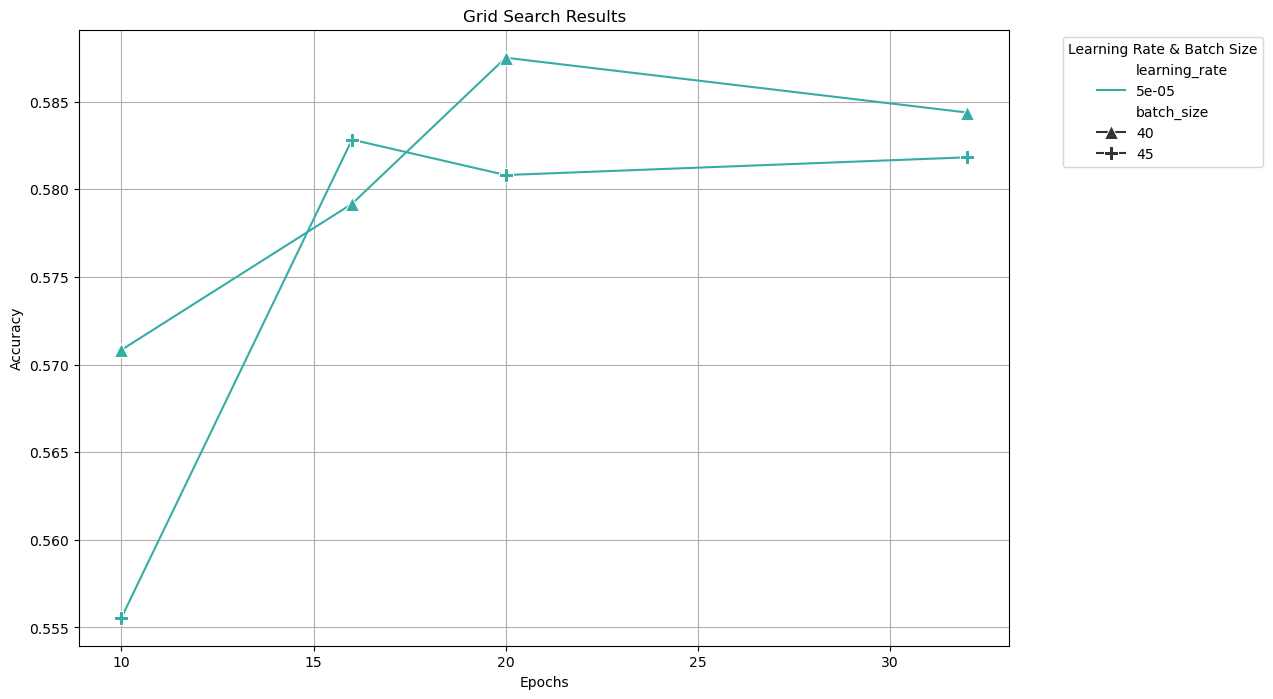

In [77]:
# Updated folder path
log_hyp_path = '../hyperparameters_log/hyperparameter_log_camembert.json'
# Load the grid search results from the file
grid_search_results = load_json_lines(log_hyp_path)

# Plot 1: All learning rates and batch sizes, but only epochs <= 20
plot_grid_search_results(grid_search_results, filter_epochs=20, color_palette=color_palette, marker_dict=marker_dict)

# Plot 2: Only learning rate 5e-05 and batch sizes 40 and 45, with all epochs
plot_grid_search_results(grid_search_results, filter_lr=5e-05, filter_batch_sizes=[40, 45], color_palette=color_palette, marker_dict=marker_dict)

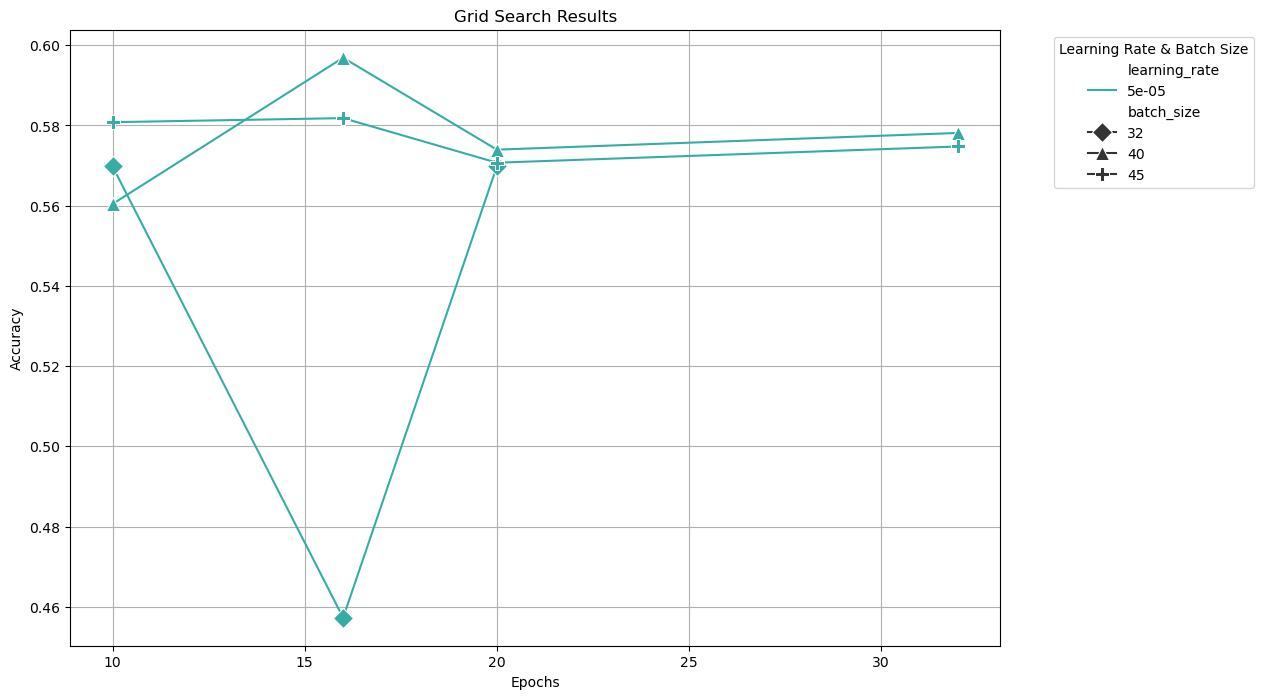

In [78]:
# Updated folder path
log_hyp_path = '../hyperparameters_log/hyperparameter_log_flaubert.json'
# Load the grid search results from the file
grid_search_results = load_json_lines(log_hyp_path)

plot_grid_search_results(grid_search_results, color_palette=color_palette, marker_dict=marker_dict)


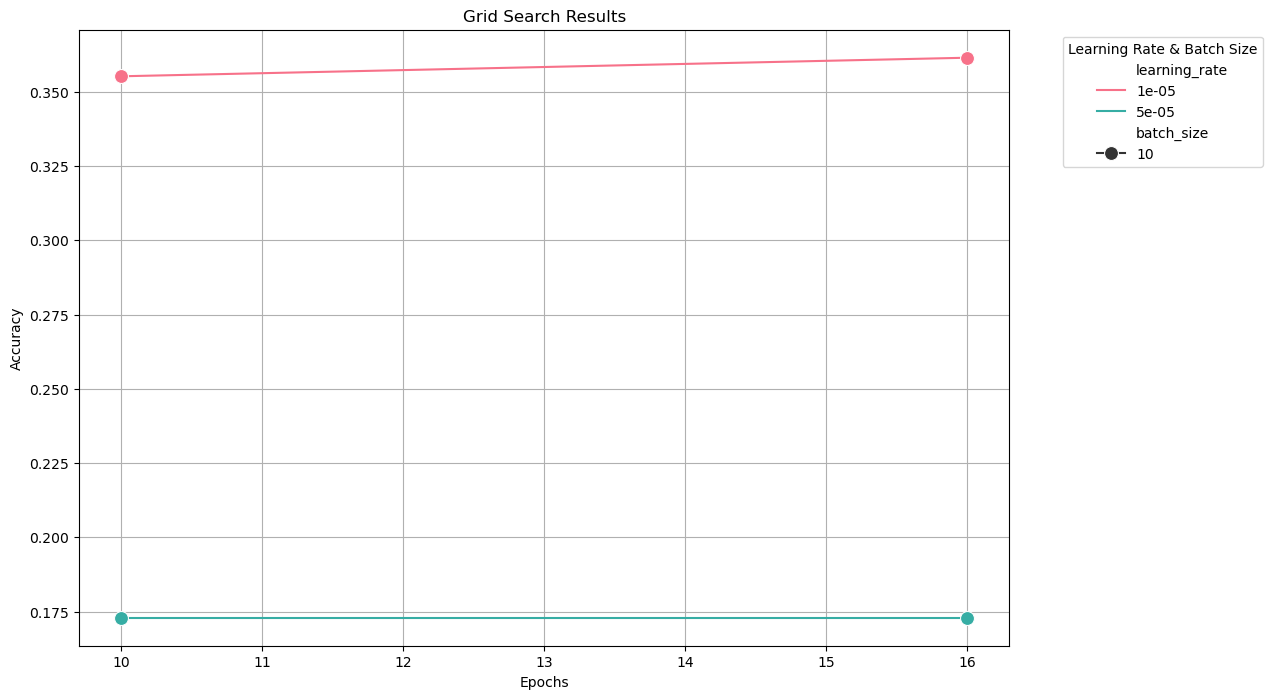

In [79]:
# Updated folder path
log_hyp_path = '../hyperparameters_log/hyperparameter_log_camembert-large.json'
# Load the grid search results from the file
grid_search_results = load_json_lines(log_hyp_path)

plot_grid_search_results(grid_search_results, color_palette=color_palette, marker_dict=marker_dict)


In [ ]:
# visualization for k-fold:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Function to load JSON lines
def load_json_lines(file_path):
    with open(file_path, 'r') as f:
        return [json.loads(line) for line in f]

def plot_grid_search_results(grid_search_results, filter_epochs=None, filter_lr=None, filter_batch_sizes=None, color_palette=None, marker_dict=None):
    df = pd.DataFrame(grid_search_results)
    df['learning_rate'] = df['hyperparameters'].apply(lambda x: x['learning_rate'])
    df['batch_size'] = df['hyperparameters'].apply(lambda x: x['batch_size'])
    df['epochs'] = df['hyperparameters'].apply(lambda x: x['epochs'])

    if filter_epochs is not None:
        df = df[df['epochs'] <= filter_epochs]
    
    if filter_lr is not None:
        df = df[df['learning_rate'] == filter_lr]
    
    if filter_batch_sizes is not None:
        df = df[df['batch_size'].isin(filter_batch_sizes)]

    plt.figure(figsize=(12, 8))
    sns.lineplot(
        data=df, 
        x='epochs', 
        y='mean_accuracy', 
        hue='learning_rate', 
        style='batch_size', 
        palette=color_palette,
        markers=marker_dict,
        dashes=False,
        markersize=10
    )
    plt.title('Grid Search Results')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(title='Learning Rate & Batch Size', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

# Define the color palette
colors = sns.color_palette("husl", 2)
lrs = [1e-05, 5e-05]
color_palette = {lr: color for lr, color in zip(lrs, colors)}

# Define the markers
bss = [10, 16, 32, 40, 45]
markers = ['o', 's', 'D', '^', 'P']
marker_dict = {bs: marker for bs, marker in zip(bss, markers)}



## Visualization of the confusion matrix for the best transformer models

In [109]:
import numpy as np
# Function to load JSON lines


# Function to plot metrics and confusion matrix
def plot_best_metrics(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    
    best_parameters = data['best_parameters']
    metrics = data['metrics']

    # Plotting confusion matrix
    confusion_matrix = np.array(metrics['confusion_matrix'])
    plt.figure(figsize=(12, 8))  # Increase width to make space for legend
    cpalette=sns.color_palette("light:deeppink", as_cmap=True)
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap=cpalette, cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    # Add legend with hyperparameters and metrics
    hyperparameters_text = (
        f"Hyperparameters:\n"
        f"Learning Rate: {best_parameters['learning_rate']}\n"
        f"Batch Size: {best_parameters['batch_size']}\n"
        f"Epochs: {best_parameters['epochs']}"
    )
    metrics_text = (
        f"Metrics:\n"
        f"Precision: {metrics['precision']:.2f}\n"
        f"Recall: {metrics['recall']:.2f}\n"
        f"F1 Score: {metrics['f1']:.2f}\n"
        f"Accuracy: {metrics['accuracy']:.2f}"
    )

    plt.text(
        confusion_matrix.shape[1] + 0.2, 0.8,
        f"{hyperparameters_text}\n\n{metrics_text}",
        fontsize=12,
        bbox=dict(facecolor='white', alpha=0.5),
        verticalalignment='center'
    )

    plt.tight_layout()
    plt.show()



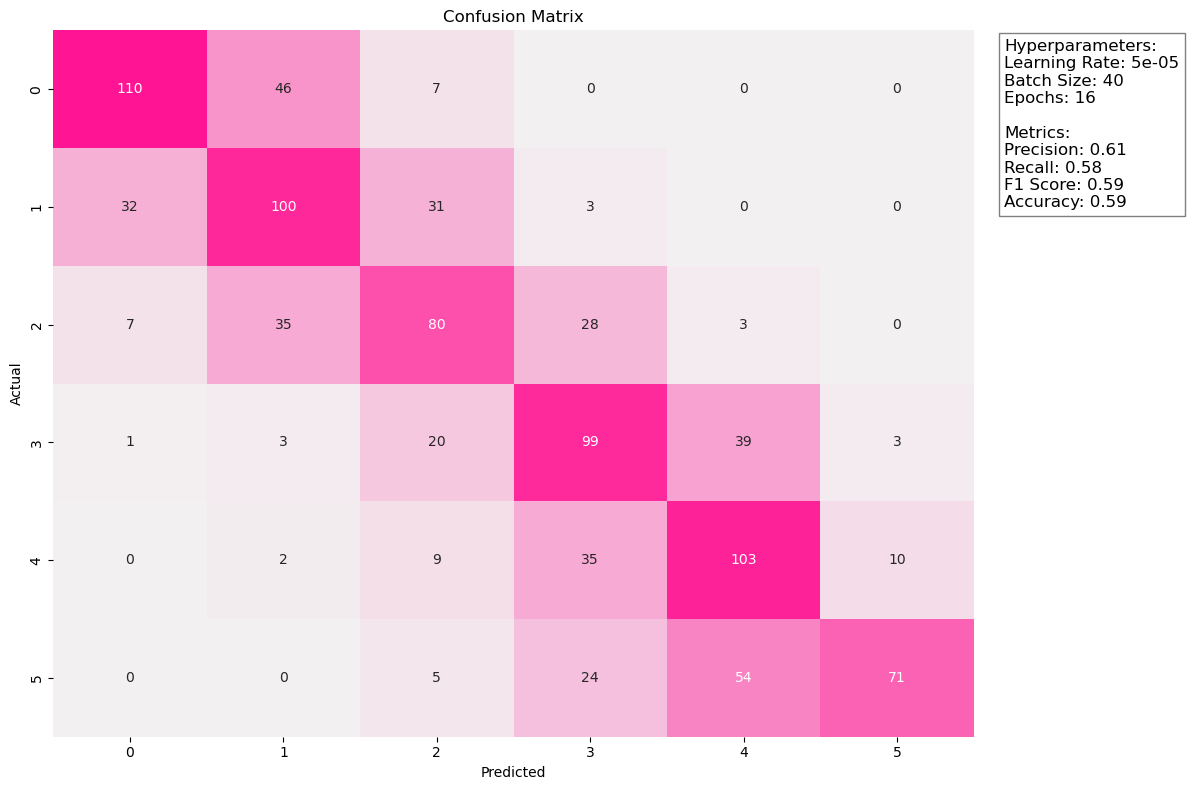

In [110]:
# Plot the best metrics and confusion matrix from the specified file
plot_best_metrics('../hyperparameters_log/best_metrics_camembert.json')